## Lista de exercícios - 008

### Francisco Romes da Silva Filho, 409976

### Imports de bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Carregando dataset

In [6]:
X, y = load_boston(return_X_y=True)

## 1. Dado o código a seguir (Fonte: Datacamp - Curso Supervised Learning with scikit-learn), use a regressão Lasso, que usa regularização L1, sobre o dataset Boston House Prices (sklearn.datasets.load_boston) para:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

### a) Mostre os coeficientes para alpha=0.1 e normalize=True. Mostre também para normalize=False.


In [11]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

In [12]:
## coef_
print("Coeficientes para alpha=0.1 e normalize=True.")
print(lasso.coef_)

Coeficientes para alpha=0.1 e normalize=True.
[-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]


In [13]:
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.6918147952283058

In [14]:
## coef_
print("Coeficientes para alpha=0.1 e normalize=False.")
print(lasso.coef_)

Coeficientes para alpha=0.1 e normalize=False.
[-1.22854422e-01  3.86385849e-02 -4.97188385e-04  1.48353759e+00
 -0.00000000e+00  3.89367421e+00 -1.96048179e-02 -1.10561397e+00
  2.16673479e-01 -1.05844004e-02 -7.44014516e-01  1.23959059e-02
 -6.02281637e-01]


### b) Mostre os coeficientes para alpha=0.4 e normalize=True. Mostre também para normalize=False.


In [15]:
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

-0.03469753992352409

In [16]:
## coef_
print("Coeficientes para alpha=0.4 e normalize=True.")
print(lasso.coef_)

Coeficientes para alpha=0.4 e normalize=True.
[-0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0.]


In [17]:
lasso = Lasso(alpha=0.4, normalize=False)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.6868261870937583

In [18]:
## coef_
print("Coeficientes para alpha=0.4 e normalize=False.")
print(lasso.coef_)

Coeficientes para alpha=0.4 e normalize=False.
[-0.11576163  0.0382639  -0.          0.         -0.          3.02904787
 -0.00594293 -0.94591883  0.21832368 -0.0105426  -0.73995647  0.01213879
 -0.66980952]


### c) Houve feature(s) removida(s) em alguma configuração acima? Qual(is)?



## 2. Dado o código a seguir (Fonte: Datacamp - Curso Supervised Learning with scikit-learn), use a regressão Ridge, que usa regularização L2, sobre o dataset Boston House Prices (sklearn.datasets.load_boston) para:

In [19]:
"""

(...)
from sklearn.linear_model import Ridge
(...)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

"""

'\n\n(...)\nfrom sklearn.linear_model import Ridge\n(...)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)\nridge = Ridge(alpha=0.1, normalize=True)\nridge.fit(X_train, y_train)\nridge_pred = ridge.predict(X_test)\nridge.score(X_test, y_test)\n\n'

### a) Adapte o código acima para mostrar em um gráfico os scores (R^2) sobre o conjunto de teste para os seguintes valores de alpha: [1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]. Use normalize=True. Esses valores de alpha podem ser facilmente obtidos no numpy usando: valores_alpha = np.logspace(-4, 0, 5).

In [20]:
valores_alpha = np.logspace(-4, 0, 5)
valores_alpha

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [21]:
r2_scores = []
for alpha in valores_alpha:
    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    r2 = ridge.score(X_test, y_test)
    r2_scores.append(r2)


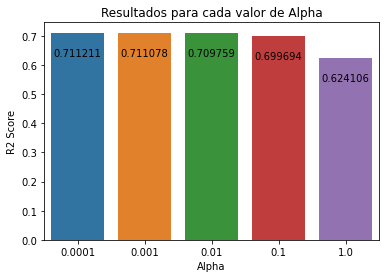

In [22]:
ax = sns.barplot(valores_alpha, r2_scores)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, -20), textcoords = 'offset points'
    )
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Resultados para cada valor de Alpha')
plt.show()

### b) Mostre o mesmo para normalize=False.


In [23]:
r2_scores = []
for alpha in valores_alpha:
    ridge = Ridge(alpha=alpha, normalize=False)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    r2 = ridge.score(X_test, y_test)
    r2_scores.append(r2)

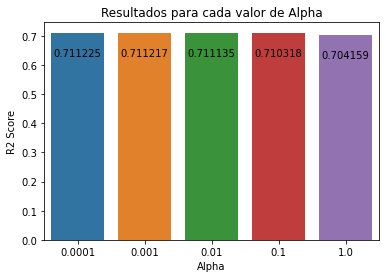

In [24]:
ax = sns.barplot(valores_alpha, r2_scores)
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, -20), textcoords = 'offset points'
    )
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Resultados para cada valor de Alpha')
plt.show()

### c) Agora pegue os hiperparâmetros do melhor resultado que você obteve. Treine um novo modelo usando-os, mas mudando agora a quantidade de épocas (hiperparâmetro max_iter) para apenas 10 (o valor default é 1000). Qual o score R^2 sobre o conjunto de teste para o novo modelo?

In [25]:
parameters = {'alpha': valores_alpha, 'normalize': [True, False] }
ridge = Ridge()

In [26]:
gv = GridSearchCV(ridge, parameters)

In [27]:
gv.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'normalize': [True, False]})

In [28]:
gv.best_estimator_

Ridge(alpha=0.1, normalize=True)

In [29]:
### Melhor modelo
ridge = Ridge(alpha=0.1, normalize=True, max_iter=10)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("R2 score: ", ridge.score(X_test, y_test))


R2 score:  0.6996938275127313


## 3. Resolva o problema de classificação binária sobre o dataset "Pima Indians Diabetes Database (link alternativo no Kaggle)". 



In [30]:
data = pd.read_csv('diabetes.csv')
print("Forma do dataset: ", data.shape[1], " features e ", data.shape[0], " amostras!")

Forma do dataset:  9  features e  768  amostras!


### 1. Separe os dados em treino (80%) e teste (20%).

In [31]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### 2. Use o algoritmo LogisticRegression.


### Crie modelos usando diferentes regularizações: Nenhuma, L1, L2, ElasticNet (penalty : None, ‘l2’ or ‘l1’ or ‘elasticnet’).


In [33]:
#l1
lr_scores = []
l1_coef = []
l1_classes = []

for alpha in valores_alpha:
        lr = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear')
        lr.fit(X_train, y_train)
        lr_pred = lr.predict(X_test)
        acc = lr.score(X_test, y_test)
        lr_scores.append(acc)
        l1_classes.append(lr.classes_)
        l1_coef.append(lr.coef_)

#### Acurácia 

In [34]:
lr_scores

[0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7857142857142857]

#### Coeficientes

In [35]:
l1_coef

[array([[ 1.16143980e-01,  3.13932020e-02, -1.21099700e-02,
         -2.18447716e-03, -4.57608618e-04,  8.24545992e-02,
          9.10773839e-01,  2.04131248e-02]]),
 array([[ 1.16138612e-01,  3.14208438e-02, -1.21034307e-02,
         -2.18750760e-03, -4.59872025e-04,  8.26040149e-02,
          9.11528871e-01,  2.04485101e-02]]),
 array([[ 1.16107655e-01,  3.14054642e-02, -1.21095057e-02,
         -2.18446824e-03, -4.58452771e-04,  8.25301264e-02,
          9.10045539e-01,  2.04324463e-02]]),
 array([[ 1.15723653e-01,  3.12387079e-02, -1.21877012e-02,
         -2.13828738e-03, -4.44500634e-04,  8.17496452e-02,
          8.95580675e-01,  2.02725373e-02]]),
 array([[ 1.12521688e-01,  2.98005215e-02, -1.29111569e-02,
         -1.73291919e-03, -3.19963344e-04,  7.50257652e-02,
          7.60252087e-01,  1.88082893e-02]])]

In [36]:
#l2
lr_scores = []
l2_coef = []
for alpha in valores_alpha:
        lr = LogisticRegression(penalty='l2', C=1/alpha, solver='liblinear')
        lr.fit(X_train, y_train)
        lr_pred = lr.predict(X_test)
        acc = lr.score(X_test, y_test)
        lr_scores.append(acc)
        l2_coef.append(lr.coef_)

#### Acurácia

In [37]:
lr_scores

[0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7857142857142857,
 0.7922077922077922]

#### Coeficientes

In [38]:
l2_coef

[array([[ 1.16146678e-01,  3.14293964e-02, -1.21009523e-02,
         -2.19112553e-03, -4.60460661e-04,  8.26451874e-02,
          9.11731118e-01,  2.04561875e-02]]),
 array([[ 1.16022172e-01,  3.13832403e-02, -1.21255159e-02,
         -2.17382167e-03, -4.56964168e-04,  8.24192650e-02,
          9.07923392e-01,  2.04122298e-02]]),
 array([[ 1.15772207e-01,  3.12493781e-02, -1.21964228e-02,
         -2.15037654e-03, -4.45908658e-04,  8.17520302e-02,
          8.99375477e-01,  2.02674746e-02]]),
 array([[ 1.14719440e-01,  3.02491967e-02, -1.27355343e-02,
         -2.03399501e-03, -3.72316145e-04,  7.71980661e-02,
          8.64512573e-01,  1.91069191e-02]]),
 array([[ 1.08712188e-01,  2.43990118e-02, -1.61901284e-02,
         -1.33802870e-03,  8.29212690e-05,  5.08044307e-02,
          6.34894264e-01,  1.21820566e-02]])]

In [39]:
#elasticnet
lr_scores = []
el_coef = []
for alpha in valores_alpha:
        lr = LogisticRegression(penalty='elasticnet', C=1/alpha, solver='saga', l1_ratio=1)
        lr.fit(X_train, y_train)
        lr_pred = lr.predict(X_test)
        acc = lr.score(X_test, y_test)
        lr_scores.append(acc)
        el_coef.append(lr.coef_)

#### Acurácia

In [40]:
lr_scores

[0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883]

#### Coeficientes

In [41]:
el_coef

[array([[ 0.02907755,  0.01073679, -0.02835187, -0.0004381 ,  0.00126065,
         -0.00682352,  0.00113671,  0.00608514]]),
 array([[ 0.02923222,  0.01075199, -0.02832755, -0.00039987,  0.00125966,
         -0.00696214,  0.00107959,  0.00607392]]),
 array([[ 0.02901487,  0.01074035, -0.02834609, -0.00042629,  0.00126141,
         -0.00686535,  0.00109774,  0.00609986]]),
 array([[ 0.02902456,  0.01073781, -0.02834438, -0.0004358 ,  0.00126115,
         -0.0068331 ,  0.00107799,  0.00608125]]),
 array([[ 0.02909045,  0.01073242, -0.02831858, -0.00040951,  0.00125863,
         -0.00681212,  0.00085433,  0.0060148 ]])]

In [42]:
#none
lr_scores = []
none_coef = []
for alpha in valores_alpha:
        lr = LogisticRegression(penalty='none', C=1/alpha)
        lr.fit(X_train, y_train)
        lr_pred = lr.predict(X_test)
        acc = lr.score(X_test, y_test)
        lr_scores.append(acc)
        none_coef.append(none_coef)

#### Acurácia 

In [43]:
lr_scores

[0.7987012987012987,
 0.7987012987012987,
 0.7987012987012987,
 0.7987012987012987,
 0.7987012987012987]

#### Coeficientes

In [44]:
none_coef

[[...], [...], [...], [...], [...]]